In [129]:

import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import math 
#Load file names for user. Change here for different user replace 000 or even path as required
filenames = glob.glob("C:/Users/shr7abt/Documents/Location/Data/Geolife Trajectories 1.3/Data/017/Trajectory/200*.plt")

#Read the files
list_of_dfs = [pd.read_csv(filename, skiprows=6, header = None) for filename in filenames]

#put the data from list into one dataframe
combined_df = pd.concat(list_of_dfs, ignore_index=True)

#rename columns
combined_df.columns = ['Latitude', 'Longitude', '0', 'Altitude', 'NumDays', 'Date', 'Time']
combined_df['ClusterId'] = -1
combined_df['ClusterMeanLat'] = -1
combined_df['ClusterMeanLon'] = -1
combined_df['SignificantPlace'] = -1

#add timestamp index
combined_df["Timestamp"] = combined_df["Date"].map(str) + " " + combined_df["Time"]
combined_df.Timestamp = pd.to_datetime(combined_df.Timestamp)
combined_df.index = pd.to_datetime(combined_df.Timestamp)

#combined_df.size
combined_df.head()

,Latitude,Longitude,0,Altitude,NumDays,Date,Time,ClusterId,ClusterMeanLat,ClusterMeanLon,SignificantPlace,Timestamp
Timestamp,,,,,,,,,,,,
2008-10-30 09:27:48,39.986477,116.320150,0,147.6,39751.394306,2008-10-30,09:27:48,-1,-1,-1,-1,2008-10-30 09:27:48
2008-10-30 09:27:49,39.986480,116.320185,0,147.6,39751.394317,2008-10-30,09:27:49,-1,-1,-1,-1,2008-10-30 09:27:49
2008-10-30 09:27:52,39.986457,116.320282,0,147.6,39751.394352,2008-10-30,09:27:52,-1,-1,-1,-1,2008-10-30 09:27:52
2008-10-30 09:27:55,39.986528,116.320337,0,147.6,39751.394387,2008-10-30,09:27:55,-1,-1,-1,-1,2008-10-30 09:27:55
2008-10-30 09:27:58,39.986525,116.320427,0,147.6,39751.394421,2008-10-30,09:27:58,-1,-1,-1,-1,2008-10-30 09:27:58


In [130]:
#Find distance between two lan:lon points in meters
def meters(lat1, lon1, lat2, lon2):  
    R = 6378.137 # Radius of earth in KM
    dLat = lat2 * math.pi / 180 - lat1 * math.pi / 180
    dLon = lon2 * math.pi / 180 - lon1 * math.pi / 180
    a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(lat1 * math.pi / 180) * math.cos(lat2 * math.pi / 180) * math.sin(dLon/2) * math.sin(dLon/2);
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a));
    d = R * c
    return d * 1000 # meters

In [131]:
#This function is to cluster the points together if thier distance is less than 50 meters.
def cluster(newlat, newlon, row):

    sampled_df['ClusterId'][row] = -1
    sampled_df['ClusterMeanLat'][row] = -1
    sampled_df['ClusterMeanLon'][row] = -1
    sampled_df['SignificantPlace'][row] = -1
    clulat = sampled_df['ClusterMeanLat'][row-1]
    clulon = sampled_df['ClusterMeanLon'][row-1]

    if meters(clulat, clulon, newlat, newlon)<= 50:
        sampled_df['ClusterId'][row] = sampled_df['ClusterId'][row-1]
        sampled_df['ClusterMeanLat'] = sampled_df.groupby('ClusterId')['Latitude'].transform(np.mean)
        sampled_df['ClusterMeanLon'] = sampled_df.groupby('ClusterId')['Longitude'].transform(np.mean)
    else:
        sampled_df['ClusterMeanLat'][row] = sampled_df['Latitude'][row]
        sampled_df['ClusterMeanLon'][row] = sampled_df['Longitude'][row]
        sampled_df['ClusterId'][row] = sampled_df['ClusterId'][row-1] + 1
    

In [132]:
#Resample the data with every two minutes. Remove this if you like to process the entire file.
#Note, it could take some time to run the further sections of the file size is very large.
sampled_df = combined_df.resample('2T').mean()
sampled_df = sampled_df.sort_values(by=['Latitude', 'Longitude'])
sampled_df = sampled_df.dropna()

#sampled_df.size
sampled_df.tail()

,Latitude,Longitude,0,Altitude,NumDays,ClusterId,ClusterMeanLat,ClusterMeanLon,SignificantPlace
Timestamp,,,,,,,,,
2009-01-31 02:12:00,40.990551,117.444637,0.0,1454.781395,39844.092376,-1.0,-1.0,-1.0,-1.0
2009-01-31 02:14:00,40.992110,117.450769,0.0,1452.485366,39844.093783,-1.0,-1.0,-1.0,-1.0
2009-01-31 02:16:00,40.993242,117.459319,0.0,1470.856962,39844.095263,-1.0,-1.0,-1.0,-1.0
2009-01-31 02:18:00,40.994594,117.468098,0.0,1450.003846,39844.096508,-1.0,-1.0,-1.0,-1.0
2009-01-31 02:20:00,40.995201,117.478746,0.0,1436.332143,39844.097895,-1.0,-1.0,-1.0,-1.0


In [133]:
#Read the file in an online manner as the points come.
row =1

sampled_df['ClusterId'][row-1] = 0
sampled_df['ClusterMeanLat'][row-1] = sampled_df['Latitude'][0]
sampled_df['ClusterMeanLon'][row-1] = sampled_df['Longitude'][0]
sampled_df['SignificantPlace'][row-1] = -1
while row < len(sampled_df):
    sampled_df = sampled_df.sort_values(by=['Latitude', 'Longitude'])
    #import pdb; pdb.set_trace()
    cluster(sampled_df['Latitude'][row], sampled_df['Longitude'][row], row)
    row= row + 1

In [155]:
#Based on distance clusters, now find the maximum and minimum datetime for each cluster
sampled_df["Timestamp"] = sampled_df.index
sampled_df["MinClusTime"] = sampled_df['Timestamp'].groupby(sampled_df['ClusterId']).transform('min')
sampled_df["MaxClusTime"] = sampled_df['Timestamp'].groupby(sampled_df['ClusterId']).transform('max')
sampled_df["ClusCount"] = sampled_df['Latitude'].groupby(sampled_df['ClusterId']).transform('count')
sampled_df.head(12)

,Latitude,Longitude,0,Altitude,NumDays,ClusterId,ClusterMeanLat,ClusterMeanLon,SignificantPlace,Timestamp,MinClusTime,MaxClusTime,ClusCount
Timestamp,,,,,,,,,,,,,
2008-11-17 00:06:00,24.470325,142.879521,0.0,-445.375000,39769.004716,0.0,24.470325,142.879521,-1.0,2008-11-17 00:06:00,2008-11-17 00:06:00,2008-11-17 00:06:00,1.0
2009-05-28 08:14:00,39.341638,116.628982,0.0,49.200000,39961.343422,1.0,39.341638,116.628982,-1.0,2009-05-28 08:14:00,2009-05-28 08:14:00,2009-05-28 08:14:00,1.0
2009-05-28 08:52:00,39.343531,116.629535,0.0,54.631250,39961.370381,2.0,39.343531,116.629535,-1.0,2009-05-28 08:52:00,2009-05-28 08:52:00,2009-05-28 08:52:00,1.0
2009-05-28 08:12:00,39.346959,116.629713,0.0,39.171111,39961.342276,3.0,39.346959,116.629713,-1.0,2009-05-28 08:12:00,2009-05-28 08:12:00,2009-05-28 08:12:00,1.0
2009-05-28 08:54:00,39.353946,116.629850,0.0,42.778151,39961.371523,4.0,39.353946,116.629850,-1.0,2009-05-28 08:54:00,2009-05-28 08:54:00,2009-05-28 08:54:00,1.0
2009-05-28 08:10:00,39.359326,116.629923,0.0,35.452336,39961.340929,5.0,39.359326,116.629923,-1.0,2009-05-28 08:10:00,2009-05-28 08:10:00,2009-05-28 08:10:00,1.0
2009-05-28 08:56:00,39.370128,116.630131,0.0,41.202655,39961.372912,6.0,39.370128,116.630131,-1.0,2009-05-28 08:56:00,2009-05-28 08:56:00,2009-05-28 08:56:00,1.0
2009-05-28 08:08:00,39.374430,116.630739,0.0,46.752632,39961.339562,7.0,39.374430,116.630739,-1.0,2009-05-28 08:08:00,2009-05-28 08:08:00,2009-05-28 08:08:00,1.0
2009-05-28 08:58:00,39.381426,116.636286,0.0,35.827928,39961.374249,8.0,39.381426,116.636286,-1.0,2009-05-28 08:58:00,2009-05-28 08:58:00,2009-05-28 08:58:00,1.0


In [160]:
#Check time difference between two points. If more than threshold(15 min) and they belong to same cluster,
#  then mark this as significant place
#check the mim and max datetime for a cluster, if the diff is more than 15 min and 
# the total num of cluster points are greater than 2, then it is a significant place, 
#  hence assign 0 to col significant place
row = 0
sampled_df = sampled_df.sort_values(by=['ClusterId'])
while row < len(sampled_df):
    
    k =sampled_df['MaxClusTime'][row]-sampled_df['MinClusTime'][row]
    l = (k / np.timedelta64(1, 'm')).astype(int)
    if l>= 15 and l<=1440 and sampled_df['ClusCount'][row] > 2:
        sampled_df['SignificantPlace'][row] = 0
    row = row + 1
    
sampled_df

C:\Users\shr7abt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,Latitude,Longitude,0,Altitude,NumDays,ClusterId,ClusterMeanLat,ClusterMeanLon,SignificantPlace,Timestamp,MinClusTime,MaxClusTime,ClusCount
Timestamp,,,,,,,,,,,,,
2008-11-17 00:06:00,24.470325,142.879521,0.0,-445.375000,39769.004716,0.0,24.470325,142.879521,-1.0,2008-11-17 00:06:00,2008-11-17 00:06:00,2008-11-17 00:06:00,1.0
2009-05-28 08:14:00,39.341638,116.628982,0.0,49.200000,39961.343422,1.0,39.341638,116.628982,-1.0,2009-05-28 08:14:00,2009-05-28 08:14:00,2009-05-28 08:14:00,1.0
2009-05-28 08:52:00,39.343531,116.629535,0.0,54.631250,39961.370381,2.0,39.343531,116.629535,-1.0,2009-05-28 08:52:00,2009-05-28 08:52:00,2009-05-28 08:52:00,1.0
2009-05-28 08:12:00,39.346959,116.629713,0.0,39.171111,39961.342276,3.0,39.346959,116.629713,-1.0,2009-05-28 08:12:00,2009-05-28 08:12:00,2009-05-28 08:12:00,1.0
2009-05-28 08:54:00,39.353946,116.629850,0.0,42.778151,39961.371523,4.0,39.353946,116.629850,-1.0,2009-05-28 08:54:00,2009-05-28 08:54:00,2009-05-28 08:54:00,1.0
2009-05-28 08:10:00,39.359326,116.629923,0.0,35.452336,39961.340929,5.0,39.359326,116.629923,-1.0,2009-05-28 08:10:00,2009-05-28 08:10:00,2009-05-28 08:10:00,1.0
2009-05-28 08:56:00,39.370128,116.630131,0.0,41.202655,39961.372912,6.0,39.370128,116.630131,-1.0,2009-05-28 08:56:00,2009-05-28 08:56:00,2009-05-28 08:56:00,1.0
2009-05-28 08:08:00,39.374430,116.630739,0.0,46.752632,39961.339562,7.0,39.374430,116.630739,-1.0,2009-05-28 08:08:00,2009-05-28 08:08:00,2009-05-28 08:08:00,1.0
2009-05-28 08:58:00,39.381426,116.636286,0.0,35.827928,39961.374249,8.0,39.381426,116.636286,-1.0,2009-05-28 08:58:00,2009-05-28 08:58:00,2009-05-28 08:58:00,1.0


In [158]:
#copy the significant places into another dataframe
signig_df = sampled_df.loc[sampled_df['SignificantPlace'] == 0]

#drop unimportant columns
signig_df = signig_df.drop(['Timestamp', 'MinClusTime', 'MaxClusTime'], axis=1)

#signig_df.size

1080

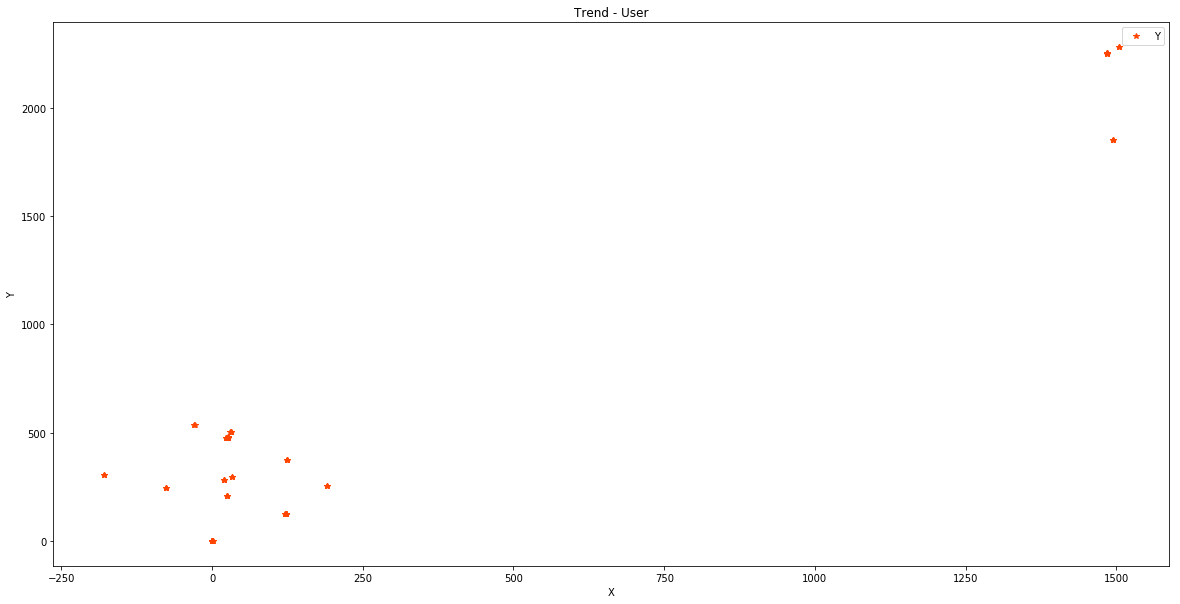

In [159]:
#Plot the significant places
#assign the first lat and log as the base for the plot i.e. origin
origin_lat = math.radians(combined_df["Latitude"][0])
origin_lon = math.radians(combined_df["Longitude"][0])
signig_df = signig_df.reset_index(drop=True)

#assign the first lat and log as the base for the plot i.e. origin
origin_lat = math.radians(signig_df["Latitude"][0])
origin_lon = math.radians(signig_df["Longitude"][0])

#convert each lat and lon into x and y for the plot w.r.t origin
EARTH_RAD = 6378100
signig_df['X'] = 0.0
signig_df['Y'] = 0.0
for i in range(0, len(signig_df)):
    x = 0
    y = 0
    current_lat = math.radians(signig_df["Latitude"][i])
    current_lon = math.radians(signig_df["Longitude"][i])
    x = ((math.cos(current_lat) + math.cos(origin_lat))/2) * EARTH_RAD * (current_lon - origin_lon) * math.pi / 180
    y = (current_lat - origin_lat)* math.pi/180 * EARTH_RAD
    signig_df.at[i, 'X'] = x
    signig_df.at[i, 'Y'] = y

#plot the x and y's
signig_df.plot(x='X', y= 'Y' , style='*', figsize=(20,10), color='orangered')
plt.title('Trend - User')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

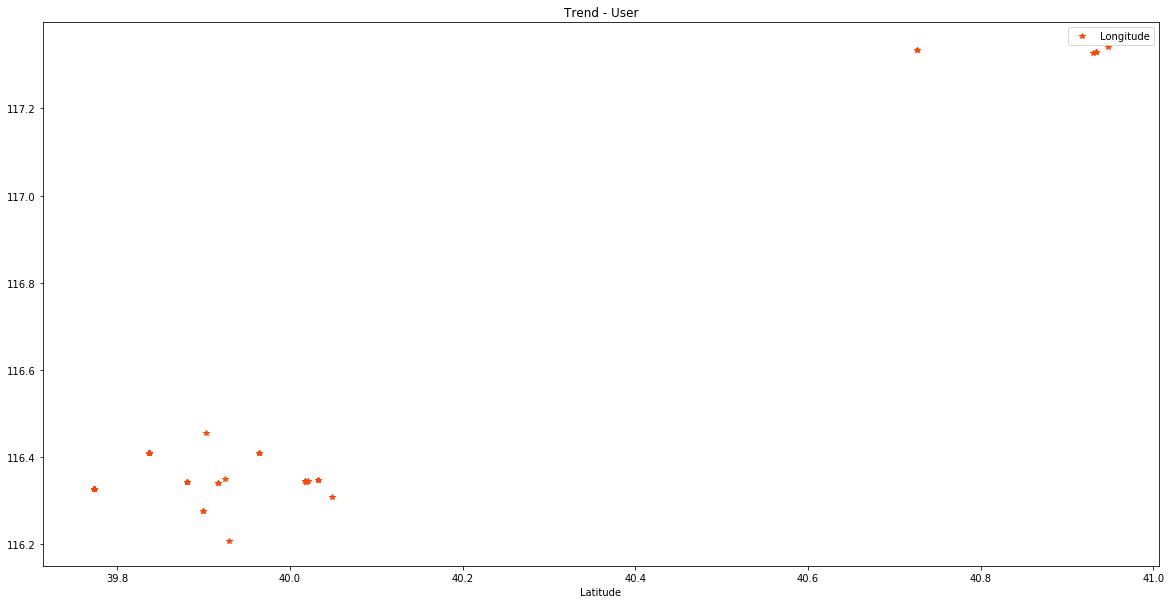

In [147]:
signig_df.plot(x='Latitude', y= 'Longitude' , style='*', figsize=(20,10), color='orangered')
plt.title('Trend - User')
plt.show()